In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [20]:
url = r"C:\Users\next3\customer-churn-prediction-analysis\data\raw\churn-bigml-80.csv"
df = pd.read_csv(url)

In [21]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [22]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Features:", categorical_cols)

Categorical Features: Index(['State', 'International plan', 'Voice mail plan'], dtype='object')


In [23]:
chi2_results = []

for col in categorical_cols:
    if col != "Churn":  
        contingency_table = pd.crosstab(df[col], df["Churn"])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_results.append({"Feature": col, "Chi2": chi2, "p-value": p})

chi2_df = pd.DataFrame(chi2_results).sort_values("p-value")
chi2_df

,Feature,Chi2,p-value
1,International plan,202.682107,5.426941e-46
2,Voice mail plan,25.656253,4.079713e-07
0,State,79.798593,4.680702e-03


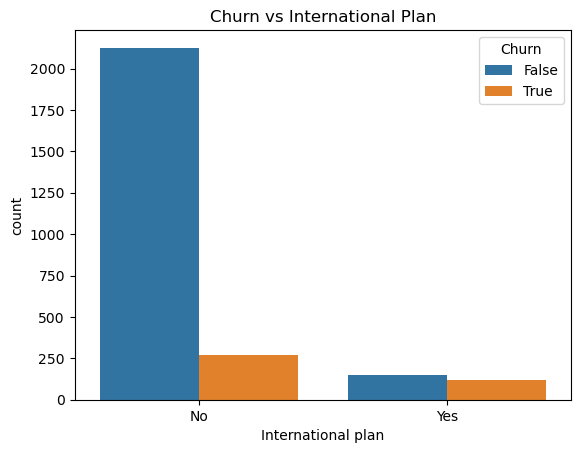

In [24]:
sns.countplot(x="International plan", hue="Churn", data=df)
plt.title("Churn vs International Plan")
plt.show()

In [25]:
for i, row in chi2_df.iterrows():
    signif = "Significant" if row["p-value"] < 0.05 else "Not Significant"
    print(f"{row['Feature']}: p-value={row['p-value']:.4f} --> {signif}")

International plan: p-value=0.0000 --> Significant
Voice mail plan: p-value=0.0000 --> Significant
State: p-value=0.0047 --> Significant
